### Neural Network Classification With Pytorch

Classification is predicting whether something or another (with multiple options)

#### Making A Toy Classification Dataset

In [30]:
## 1. Data: Making Classification Data And Getting It Ready

import sklearn
from sklearn.datasets import make_circles

# making 1000 samples
nSamples = 1000

# Creating circles using the make_circles import
X, y = make_circles(nSamples,
                    noise=0.02,
                    random_state= 246)

len(X), len(y)

(1000, 1000)

In [31]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

# 2 samples of X relating to one sample of y

First 5 samples of X: 
 [[ 0.98450035 -0.23121381]
 [-0.05718257  1.0098412 ]
 [-1.00848704 -0.07346352]
 [-0.75291799 -0.27141985]
 [ 0.53773699  0.60973025]]
First 5 samples of y: 
 [0 0 0 1 1]


In [32]:
y
# binary classification: one thing or the other, one or zero

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [33]:
# Making DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], # first element in X to X1
                        "X2": X[:, 1], # second element in X to X2
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.984500,-0.231214,0
1,-0.057183,1.009841,0
2,-1.008487,-0.073464,0
3,-0.752918,-0.271420,1
4,0.537737,0.609730,1
5,-0.229706,0.772044,1
6,0.651580,0.538344,1
7,0.728727,-0.264977,1
8,-0.784848,0.160091,1
9,-1.011303,-0.107825,0


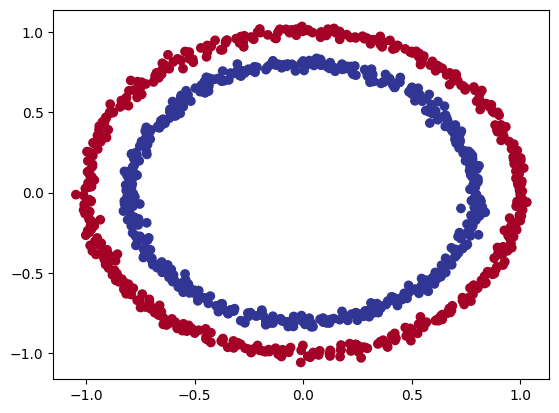

In [34]:
# Visualizing the Data
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu) # type: ignore

# from this graph we want the model to predict whether the point is going to be a blue dot or a red dot from the graph and coordinates below: Binary Classification as the dots can only be blue or red
# Note: the data below is often referred to as a toy data set --> small enough to experiment with, but large enough to practice fundamentals 

In [35]:
X.shape, y.shape
# X has a thousand data points with each point having 2 columns
# and y is just a scalar so it has no features or shape, it is only a label: a thousand samples of y: with one corresponding to red or blue, and zero corresponding to the other value 

# two features of x trying to predict one feature of y

((1000, 2), (1000,))

In [36]:
X

array([[ 0.98450035, -0.23121381],
       [-0.05718257,  1.0098412 ],
       [-1.00848704, -0.07346352],
       ...,
       [-0.21257057,  0.78101498],
       [-0.44090698,  0.87529831],
       [ 0.54480896, -0.58081595]])

In [37]:
# View the first example of features and labels

XSample = X[0]
ySample = y[0]

print(f"Values for a single example of X: {XSample} and a single example of y: {ySample}")
print(f"Shape for a single example of X: {XSample.shape} and shape for a single example of y: {ySample.shape}")

Values for a single example of X: [ 0.98450035 -0.23121381] and a single example of y: 0
Shape for a single example of X: (2,) and shape for a single example of y: ()


#### Turning Data Into Tensors
* Checking input and output shapes
* Creating train and test splits 

In [38]:
import torch
torch.__version__, type(X), X.dtype

('2.1.1+cu118', numpy.ndarray, dtype('float64'))

In [39]:
# Turn Data Into Tensors

X = torch.from_numpy(X).type(torch.float) # converting to torch from numpy, and setting torch.float as default dtype for numpy if float64
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.9845, -0.2312],
         [-0.0572,  1.0098],
         [-1.0085, -0.0735],
         [-0.7529, -0.2714],
         [ 0.5377,  0.6097]]),
 tensor([0., 0., 0., 1., 1.]))

In [40]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [41]:
# Splitting the data into training and testing sets
# Since the data is randomly positioned, it it possible in this case to split the data set randomly

from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2, # test_size = 0.2 means 20 percent will be test, and 80 percent will be train
                                                random_state=246) # random state is equivalent to the random seed function in pytorch

# The random seed in pytorch only works for pytorch method

In [44]:
len(XTrain), len(XTest), len(yTrain), len(yTest)

# 20 percent testing values here is 200 data points, and 800 data points for 80 percent for training values

(800, 200, 800, 200)

In [43]:
nSamples

1000